<a href="https://colab.research.google.com/github/discipulum/discipulum/blob/master/ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
wc = pd.read_csv('World Cup 2018 Dataset.csv')

In [ ]:
wc.head(3)

,Team,Group,Previous \nappearances,Previous \ntitles,Previous\n finals,Previous\n semifinals,Current \nFIFA rank,First match \nagainst,Match index,history with \nfirst opponent\n W-L,history with\n first opponent\n goals,Second match\n against,Match index.1,history with\n second opponent\n W-L,history with\n second opponent\n goals,Third match\n against,Match index.2,history with\n third opponent\n W-L,history with\n third opponent\n goals,Unnamed: 19
0,Russia,A,10.0,0.0,0.0,1.0,65.0,Saudi Arabia,1.0,-1.0,-2.0,Egypt,17.0,NaN,NaN,Uruguay,33.0,0.0,0.0,NaN
1,Saudi Arabia,A,4.0,0.0,0.0,0.0,63.0,Russia,1.0,1.0,2.0,Uruguay,18.0,1.0,1.0,Egypt,34.0,-5.0,-5.0,NaN
2,Egypt,A,2.0,0.0,0.0,0.0,31.0,Uruguay,2.0,-1.0,-2.0,Russia,17.0,NaN,NaN,Saudi Arabia,34.0,5.0,5.0,NaN


In [ ]:
wc.size
wc.shape

(33, 20)

In [ ]:
wc.tail(5)

,Team,Group,Previous \nappearances,Previous \ntitles,Previous\n finals,Previous\n semifinals,Current \nFIFA rank,First match \nagainst,Match index,history with \nfirst opponent\n W-L,history with\n first opponent\n goals,Second match\n against,Match index.1,history with\n second opponent\n W-L,history with\n second opponent\n goals,Third match\n against,Match index.2,history with\n third opponent\n W-L,history with\n third opponent\n goals,Unnamed: 19
28,Poland,H,7.0,0.0,0.0,2.0,7.0,Senegal,15.0,NaN,NaN,Columbia,31.0,NaN,NaN,Japan,47.0,2.0,3.0,NaN
29,Senegal,H,1.0,0.0,0.0,0.0,23.0,Poland,15.0,NaN,NaN,Japan,32.0,2.0,3.0,Columbia,48.0,0.0,0.0,NaN
30,Columbia,H,5.0,0.0,0.0,0.0,13.0,Japan,16.0,2.0,2.0,Poland,31.0,NaN,NaN,Senegal,48.0,0.0,0.0,NaN
31,Japan,H,5.0,0.0,0.0,0.0,55.0,Columbia,16.0,-2.0,-2.0,Senegal,32.0,-2.0,-3.0,Poland,47.0,-2.0,-3.0,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# dataset results

results = pd.read_csv('results.csv')

In [ ]:
results.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,London,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland
6,1877-03-03,England,Scotland,1,3,Friendly,London,England
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland


In [ ]:
# agregar columna GANADOR (winner)

winner = []

# verificar quien ganó o si fue un empate
for i in range(len(results['home_team'])):
    if results['home_score'][i] > results['away_score'][i]:
        winner.append(results['home_team'][i])
    elif results['home_score'][i] < results['away_score'][i]:
        winner.append(results['away_team'][i])
    else:
        winner.append('Tie')

results['winning_team'] = winner

# nueva columna "goal_difference"
results['goal_difference'] = np.absolute(results['home_score'] - results['away_score'])

In [ ]:
results.tail(7)

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference
38895,2018-03-27,Namibia,Lesotho,2,1,Friendly,Windhoek,Namibia,Namibia,1
38896,2018-03-27,Laos,Bangladesh,2,2,Friendly,Vientiane,Laos,Tie,0
38897,2018-03-27,Mongolia,Mauritius,0,2,Friendly,Ulan Bator,Mongolia,Mauritius,2
38898,2018-03-27,Seychelles,Swaziland,0,0,Friendly,Victoria,Seychelles,Tie,0
38899,2018-03-27,Kosovo,Burkina Faso,2,0,Friendly,Franconville,France,Kosovo,2
38900,2018-03-27,Iraq,Syria,1,1,Friendly,Basra,Iraq,Tie,0
38901,2018-04-01,Malaysia,Bhutan,7,0,Friendly,Kuala Lumpur,Malaysia,Malaysia,7


In [ ]:
df_colombia = results[(results['home_team'] == 'Colombia') | (results['away_team'] == 'Colombia')]

In [ ]:
df_colombia.head(7)

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference
2086,1938-08-08,Colombia,Peru,2,4,Friendly,Bogotá,Colombia,Peru,2
2087,1938-08-10,Colombia,Ecuador,1,2,Friendly,Bogotá,Colombia,Ecuador,1
2090,1938-08-13,Colombia,Venezuela,2,0,Friendly,Bogotá,Colombia,Colombia,2
2091,1938-08-16,Colombia,Bolivia,1,2,Friendly,Bogotá,Colombia,Bolivia,1
2452,1945-01-21,Brazil,Colombia,3,0,Copa América,Santiago,Chile,Brazil,3
2456,1945-01-28,Colombia,Uruguay,0,7,Copa América,Santiago,Chile,Uruguay,7
2458,1945-01-31,Chile,Colombia,2,0,Copa América,Santiago,Chile,Chile,2


In [ ]:
df_colombia.shape

(524, 10)

In [ ]:
# nueva columna MATCH_YEAR (año)

colombia = df_colombia.iloc[:]

year = []

for row in colombia['date']:
    year.append(int(row[:4]))
colombia['match_year'] = year

In [ ]:
# 1930 hay WC

colombia_1930 = colombia[colombia.match_year >= 1930]

In [ ]:
colombia_1930.count()

date               524
home_team          524
away_team          524
home_score         524
away_score         524
tournament         524
city               524
country            524
winning_team       524
goal_difference    524
match_year         524
dtype: int64

In [ ]:
# auxiliar para graficar

winrate = []
for row in colombia_1930['winning_team']:
    if row != 'Colombia' and row != 'Tie':
        winrate.append('Loss')
    else:
        winrate.append(row)
dfwinrate = pd.DataFrame(winrate, columns=['resultColombia'])

In [ ]:
# Plot with Seaborn and show
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

([<matplotlib.axis.XTick at 0x7f21c1ca4d50>],
 <a list of 1 Text major ticklabel objects>)

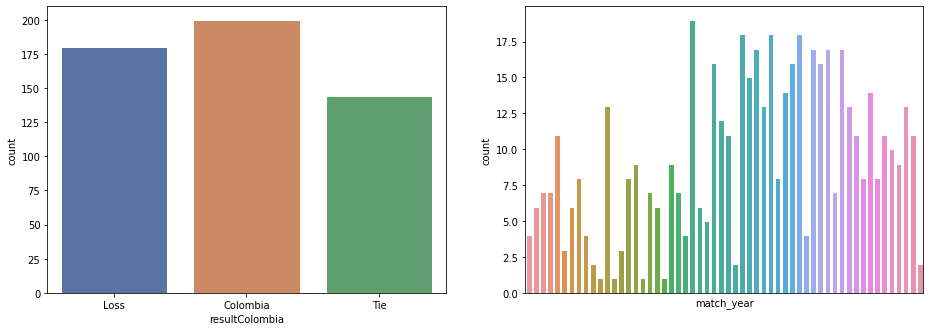

In [ ]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15.7, 5.27)

sns.set(style="darkgrid")

# grafico izquierda
sns.countplot(x='resultColombia', data=dfwinrate, ax = ax[0])
#grafico derecha
sns.countplot(x='match_year', data=colombia_1930, ax = ax[1])

plt.xticks(np.arange(min(colombia_1930.match_year), max(colombia_1930.match_year), 100))

In [ ]:
# organizando nuestro DATASET

# equipos del WC
wc_teams = ['Australia', ' Iran', 'Japan', 'Korea Republic', 
            'Saudi Arabia', 'Egypt', 'Morocco', 'Nigeria', 
            'Senegal', 'Tunisia', 'Costa Rica', 'Mexico', 
            'Panama', 'Argentina', 'Brazil', 'Colombia', 
            'Peru', 'Uruguay', 'Belgium', 'Croatia', 
            'Denmark', 'England', 'France', 'Germany', 
            'Iceland', 'Poland', 'Portugal', 'Russia', 
            'Serbia', 'Spain', 'Sweden', 'Switzerland']

In [ ]:
# local - visitante

df_teams_home = results[results['home_team'].isin(wc_teams)]
df_teams_away = results[results['away_team'].isin(wc_teams)]

In [ ]:
df_teams = pd.concat((df_teams_home, df_teams_away))

In [ ]:
df_teams.drop_duplicates()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,England,2
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,Tie,0
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,Scotland,2
10,1879-01-18,England,Wales,2,1,Friendly,London,England,England,1
11,1879-04-05,England,Scotland,5,4,Friendly,London,England,England,1
...,...,...,...,...,...,...,...,...,...,...
38851,2018-03-26,Wales,Uruguay,0,1,Friendly,Nanning,China,Uruguay,1
38867,2018-03-27,Greece,Egypt,1,0,Friendly,Zurich,Switzerland,Greece,1
38877,2018-03-27,Ukraine,Japan,2,1,Friendly,Liège,Belgium,Ukraine,1
38880,2018-03-27,Romania,Sweden,1,0,Friendly,Craiova,Romania,Romania,1


In [ ]:
year = []
for row in df_teams['date']:
    year.append(int(row[:4]))
df_teams['match_year'] = year

In [ ]:
df_teams.shape

(20565, 11)

In [ ]:
# lista de equipos a partir de 1930
df_teams30 = df_teams[df_teams.match_year >= 1930]

In [ ]:
df_teams30.tail(7)

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference,match_year
38877,2018-03-27,Ukraine,Japan,2,1,Friendly,Liège,Belgium,Ukraine,1,2018
38878,2018-03-27,Belgium,Saudi Arabia,4,0,Friendly,Brussels,Belgium,Belgium,4,2018
38880,2018-03-27,Romania,Sweden,1,0,Friendly,Craiova,Romania,Romania,1,2018
38881,2018-03-27,Bosnia-Herzegovina,Senegal,0,0,Friendly,Le Havre,France,Tie,0,2018
38883,2018-03-27,Peru,Iceland,3,1,Friendly,Harrison,USA,Peru,2,2018
38885,2018-03-27,Tunisia,Costa Rica,1,0,Friendly,Nice,France,Tunisia,1,2018
38887,2018-03-27,Poland,Korea Republic,3,2,Friendly,Chorzów,Poland,Poland,1,2018


In [ ]:
df_teams30 = df_teams30.drop(['date', 'home_score', 'away_score', 'tournament', 'city', 'country', 'goal_difference'], axis=1)

In [ ]:
df_teams30.shape

(19472, 4)

In [ ]:
df_teams30.head(3)

,home_team,away_team,winning_team,match_year
1230,Spain,Czechoslovakia,Spain,1930
1231,Portugal,Czechoslovakia,Portugal,1930
1237,Portugal,France,Portugal,1930


In [ ]:
# resetear indeces

df_teams30 = df_teams30.reset_index(drop=True)

In [ ]:
df_teams30.head(3)

,home_team,away_team,winning_team,match_year
0,Spain,Czechoslovakia,Spain,1930
1,Portugal,Czechoslovakia,Portugal,1930
2,Portugal,France,Portugal,1930


In [ ]:
# ajustes para tipos de datos 
df_teams30.loc[df_teams30.winning_team == df_teams30.home_team, 'winning_team']= 2
df_teams30.loc[df_teams30.winning_team == 'Tie', 'winning_team']= 1
df_teams30.loc[df_teams30.winning_team == df_teams30.away_team, 'winning_team']= 0

In [ ]:
df_teams30.head(3)

,home_team,away_team,winning_team,match_year
0,Spain,Czechoslovakia,2,1930
1,Portugal,Czechoslovakia,2,1930
2,Portugal,France,2,1930


In [ ]:
df_teams30 = df_teams30.drop(['match_year'], axis=1)

In [ ]:
df_teams30.head(3)

,home_team,away_team,winning_team
0,Spain,Czechoslovakia,2
1,Portugal,Czechoslovakia,2
2,Portugal,France,2


In [ ]:
df_teams30.tail(3)

,home_team,away_team,winning_team
19469,Peru,Iceland,2
19470,Tunisia,Costa Rica,2
19471,Poland,Korea Republic,2


In [ ]:
df_teams30.shape

(19472, 3)

In [ ]:
# dividir DATASET en training y testing 

# importar split del sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# getdummies de Pandas

df_final = pd.get_dummies(df_teams30, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

In [ ]:
df_final.head(3)

,winning_team,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,home_team_Austria,home_team_Azerbaijan,home_team_Bahrain,home_team_Bangladesh,home_team_Barbados,home_team_Belarus,home_team_Belgium,home_team_Belize,home_team_Benin,home_team_Bermuda,home_team_Bhutan,home_team_Bolivia,home_team_Bosnia-Herzegovina,home_team_Botswana,home_team_Brazil,home_team_Brunei,home_team_Bulgaria,home_team_Burkina Faso,home_team_Burma,home_team_Burundi,home_team_Cambodia,home_team_Cameroon,home_team_Canada,home_team_Cape Verde,home_team_Central African Republic,home_team_Chad,home_team_Chile,home_team_China,home_team_Colombia,home_team_Congo,...,away_team_Solomon Islands,away_team_South Africa,away_team_Spain,away_team_Sri Lanka,away_team_St Kitts and Nevis,away_team_St Lucia,away_team_St Vincent and the Grenadines,away_team_Sudan,away_team_Suriname,away_team_Swaziland,away_team_Sweden,away_team_Switzerland,away_team_Syria,away_team_Tahiti,away_team_Taiwan,away_team_Tajikistan,away_team_Tanzania,away_team_Thailand,away_team_Togo,away_team_Trinidad and Tobago,away_team_Tunisia,away_team_Turkey,away_team_Turkmenistan,away_team_USA,away_team_Uganda,away_team_Ukraine,away_team_United Arab Emirates,away_team_Uruguay,away_team_Uzbekistan,away_team_Vanuatu,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# X ~ Y 
X = df_final.drop(['winning_team'], axis=1)

Y = df_final['winning_team']
Y = Y.astype('int')

In [ ]:
# training / testing 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(15577, 416)

In [ ]:
Y_train.shape

(15577,)

In [ ]:
X_test.shape

(3895, 416)

In [ ]:
Y_test.shape

(3895,)

In [ ]:
### ENTRENAR UN MODELO 

In [ ]:
# sklearn
from sklearn.linear_model import LogisticRegression

In [ ]:
# definir modelo
model_logreg = LogisticRegression()

# entrenar
model_logreg.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model_logreg.score(X_train, Y_train)

0.5723823586056365

In [ ]:
model_logreg.score(X_test, Y_test)

0.5612323491655969

In [ ]:
# probemos con mas modelos 

In [ ]:
# otras evaluaciones 
from sklearn.metrics import accuracy_score, log_loss

# otros modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# 4 modelos
models = [KNeighborsClassifier(3), 
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          LogisticRegression()
          ]

In [ ]:
# logs
log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

# accuracy
acc_dict = {}

In [ ]:
# for para que entrene el X_train, Y_train con los 4 modelos

for clf in models:
  name = clf.__class__.__name__
  clf.fit(X_train, Y_train)
  
  y_pred = clf.predict(X_test)

  acc = accuracy_score(Y_test, y_pred)

  if name in acc_dict:
        acc_dict[name] += acc
  else:
        acc_dict[name] = acc

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# iterar sobre acc_dict (diccionario accuracy)

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

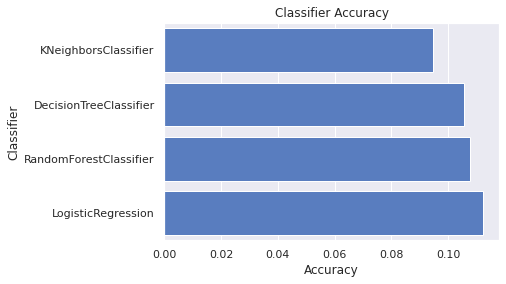

In [ ]:
# graficar resultados 

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")